## Extract bubble from simulations

In [1]:
cd '/home/dpirvu/project/prefactor/'

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
/home/dpirvu/project/prefactor


In [2]:
import os,sys
#sys.path.remove('/home/dpirvu/DarkPhoton/hmvec-master')
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('/home/dpirvu/project/prefactor/free_bubbles_codes')
#sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
#sys.path.remove('/home/dpirvu/project/prefactor/bubbles_codes')
print(sys.path)
from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera

%matplotlib inline


['/home/dpirvu', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/python_stuff/', '/home/dpirvu/project/prefactor/free_bubbles_codes']


In [3]:
def beautify(ax, ttl=None, bb=None, lens=True):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        if lens:
            aa.legend(title=ttl, bbox_to_anchor=bb, frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
    return ax

def beautify_anim(ax, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
    return ax


In [4]:
case = 'free'
general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general


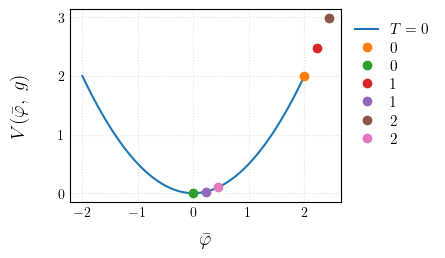

In [5]:
if True:
    philist = np.linspace(-2., 2., 100)
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))

    for tmp in range(len(tempList[:1])):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])

        ax.plot(philist, V(philist), label=r'$T={:.0f}$'.format(temp))
        for nn in np.linspace(0, 2, 3):
            ax.plot(right_Vmax + nn*sigmafld, V(right_Vmax + nn*sigmafld), 'o', label=r'${:.0f}$'.format(nn))
            ax.plot(nn*sigmafld, V(nn*sigmafld), 'o', label=r'${:.0f}$'.format(nn))

    ax.set_xlabel(r'$\bar{\varphi}$')
    ax.set_ylabel(r'$V(\bar{\varphi},\; g)$')
    beautify(ax, bb=(1,1))
    plt.savefig('./plots/potential.pdf')
    plt.show()


In [6]:
# check energy time evolution in the free field case
# in initial conditions check potential and kinetic conservation separately, should satisfy equilibrium condition
# in each ensemble as a funciton of temp, totla energy should be T*N
# do the same for time evolution of potential and kinetic and see how it changes
# check total average energy without short modes
# set momentum and field with different mass over finite low k range
# for i = k1, k2, 1: fld * sqrt(2)

In [7]:
tmp=0
temp, m2, sigmafld = get_model(*general, tmp, case)
exp_params = np.asarray([nLat, m2, temp])
print('Experiment', exp_params)

sim = 1
path2sim = sim_location(*exp_params, sim)
print(path2sim)

tdecay, initcond, real, outcome = get_realisation(nLat, sim, nTimeMAX, path2sim)
real[np.isnan(real)] = 0.

nC, nT, nN    = np.shape(real)
fld, mom, grd = real[0], real[1], real[2]

TEN_data = dx * np.sum(0.5*mom**2. + 0.5*grd**2. + V(fld), axis=-1)
KEN_data = dx * np.sum(0.5*mom**2.                       , axis=-1)
GEN_data = dx * np.sum(0.5*grd**2.                       , axis=-1)
PEN_data = dx * np.sum(V(fld)                            , axis=-1)
EMT_data = dx * np.sum(mom * grd                         , axis=-1)

fldPS = np.abs(np.fft.fft(fld, axis=-1))**2. / nLat
momPS = np.abs(np.fft.fft(mom, axis=-1))**2. / nLat

TEN_four = dx * np.sum(0.5 * momPS + 0.5 * w2(m2) * fldPS, axis=-1)
KEN_four = dx * np.sum(0.5 * momPS                       , axis=-1)
PEN_four = dx * np.sum(0.5 * w2(m2) * fldPS              , axis=-1)

Experiment [4.096e+03 1.000e+00 1.000e-01]
/gpfs/dpirvu/prefactor/x4096_m2eff1.0000_T0.1000_sim1_fields.dat


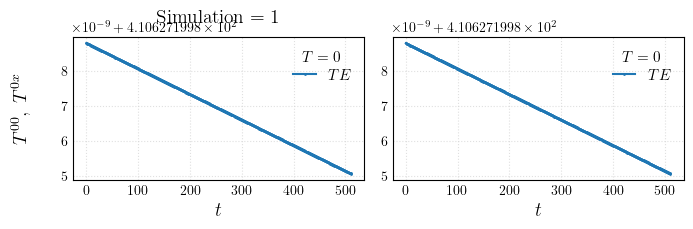

In [8]:
fig, ax = plt.subplots(1,2, figsize = (7,2.5))
#[aa.axhline(temp * nLat / 2, ls=':', color='darkgray') for aa in ax]
#[aa.axhline(temp * nLat, ls=':', color='darkgray') for aa in ax]

tlist = np.arange(len(TEN_data))
#ax[0].plot(tlist, EMT_data, label=r'$EMT$', ls='-', marker='o', ms=1)
ax[0].plot(tlist, TEN_data, label=r'$TE$',  ls='-', marker='o', ms=1)
#ax[0].plot(tlist, KEN_data, label=r'$KE$',  ls='-', marker='o', ms=1)
#ax[0].plot(tlist, GEN_data, label=r'$GE$',  ls='-', marker='o', ms=1)
#ax[0].plot(tlist, PEN_data, label=r'$PE$',  ls='-', marker='o', ms=1)

ax[1].plot(tlist, TEN_four, label=r'$TE$',  ls='-', marker='o', ms=1)
#ax[1].plot(tlist, KEN_four, label=r'$KE$',  ls='-', marker='o', ms=1)
#ax[1].plot(tlist, PEN_four, label=r'$GE$',  ls='-', marker='o', ms=1)

[aa.set_xlabel(r'$t$') for aa in ax]
ax[0].set_ylabel(r'$T^{00}, \; T^{0x}$')
ax[0].set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim))
beautify(ax, ttl=r'$T={:.0f}$'.format(temp))
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Shapes, (512, 4096) , (3, 512, 4096)


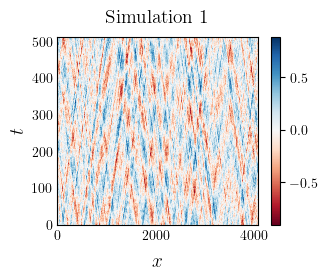

In [9]:
print('Shapes,', np.shape(fld), ',', np.shape(real))
nT, nN = np.shape(fld)

fig, ax = plt.subplots(1,1, figsize = (3.5, 3))
ext = [0, nN, 0, nT]
im  = ax.imshow(fld, interpolation='none', aspect='auto', extent=ext, origin='lower', cmap='RdBu')
clb = plt.colorbar(im, ax=ax)
for aa in [ax]:
    aa.set_title(r'${{\rm Simulation}} \;{:.0f}$'.format(sim))
    aa.set_xlabel(r'$x$')
    aa.set_ylabel(r'$t$')
beautify(ax)
plt.tight_layout(); plt.show()

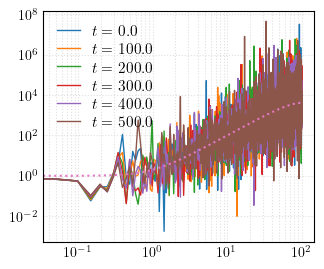

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (3.5, 3))
for tt in np.arange(0, nT-1, 100):
    fftfld = np.abs(np.fft.fft(fld[tt,:], axis=-1))**2.
    fftmom = np.abs(np.fft.fft(mom[tt,:], axis=-1))**2.
    kmax = dk*nLat/2
    plt.plot(klist[(klist>=0)&(klist<kmax)], (fftmom/fftfld)[(klist>=0)&(klist<kmax)], ls='-', lw=1, label=r'$t={:.1f}$'.format((tdecay + tt)))

plt.plot(klist[(klist>=0)&(klist<kmax)], w2(m2)[(klist>=0)&(klist<kmax)], ls=':')
plt.yscale('log')
plt.xscale('log')
ax = beautify(ax)
plt.show()

(50,) (50,)
(4096,) (4096,)
(50,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


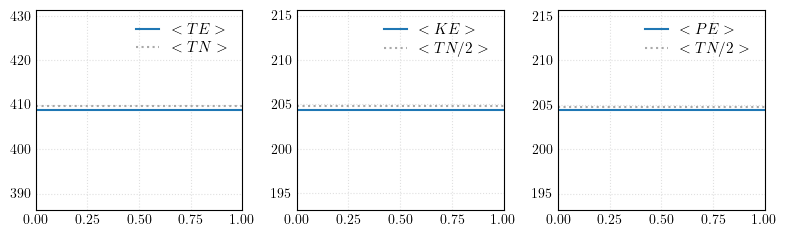

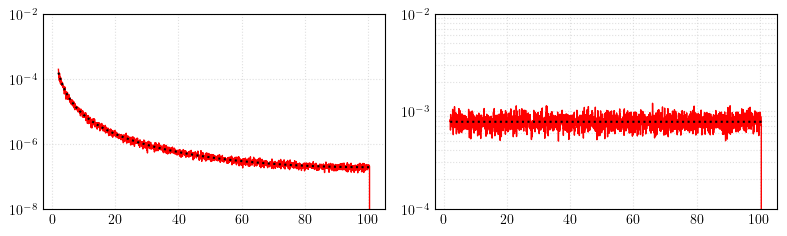

In [11]:
# Check initial conditions
fig1, ax1 = plt.subplots(1, 3, figsize = (8.,2.5))
fig2, ax2 = plt.subplots(1, 2, figsize = (8.,2.5))
cols=allcolors[:len(tempList)][::-1]

tlist = np.arange(nT)
xlist = np.arange(nLat)

#for tmp in reversed(range(len(tempList))):
for tmp in range(len(tempList[:1])):
    temp, m2, sigmafld = get_model(*general, tmp, case)
    exp_params = np.asarray([nLat, m2, temp])
    labs = r'$T={:.1f}$'.format(temp)

    kmin, kmax = 2, dk*nLat

    initial_conditions = np.load(init_cond_file(*exp_params, minSim, maxSim, nTimeMAX), allow_pickle=True)
    real_space_fld = initial_conditions[:,1]
    real_space_mom = initial_conditions[:,2]
    real_space_grd = initial_conditions[:,3]
    four_space_fld = initial_conditions[:,4]
    four_space_mom = initial_conditions[:,5]
    four_space_grd = initial_conditions[:,6]

    print(np.shape(four_space_fld), np.shape(four_space_mom))
    print(np.shape(four_space_fld[0]), np.shape(four_space_mom[0]))
    fft_ten = np.array([dx * nLat * np.sum(0.5*four_space_mom[ss] + 0.5 * w2(m2) * four_space_fld[ss], axis=-1) for ss in range(minSim,maxSim)])
    fft_ken = np.array([dx * nLat * np.sum(0.5*four_space_mom[ss]                                    , axis=-1) for ss in range(minSim,maxSim)])
    fft_pen = np.array([dx * nLat * np.sum(0.5 * w2(m2) * four_space_fld[ss]                         , axis=-1) for ss in range(minSim,maxSim)])
    print(np.shape(fft_ten))

    ax1[0].axhline(np.mean(fft_ten, axis=0), label=r'$<TE>$')
    ax1[1].axhline(np.mean(fft_ken, axis=0), label=r'$<KE>$')
    ax1[2].axhline(np.mean(fft_pen, axis=0), label=r'$<PE>$')
    ax1[0].axhline(temp * nLat, ls=':', color='darkgray', label=r'$<T N>$')
    ax1[1].axhline(temp * nLat/2, ls=':', color='darkgray', label=r'$<T N/2>$')
    ax1[2].axhline(temp * nLat/2, ls=':', color='darkgray', label=r'$<T N/2>$')

    ax2[0].plot(klist[(klist>kmin)&(klist<kmax)], np.mean(four_space_fld, axis=0)[(klist>kmin)&(klist<kmax)], color='r', lw=1)
    ax2[0].plot(klist[(klist>kmin)&(klist<kmax)], pspec(temp,m2)[(klist>kmin)&(klist<kmax)], ls=':', color='k')

    ax2[1].plot(klist[(klist>kmin)&(klist<kmax)], np.mean(four_space_mom, axis=0)[(klist>kmin)&(klist<kmax)], color='r', lw=1)
    ax2[1].plot(klist[(klist>kmin)&(klist<kmax)], (w2(m2)*pspec(temp,m2))[(klist>kmin)&(klist<kmax)], ls=':', color='k')

[aa.set_yscale('log') for aa in ax2]
#[aa.set_xscale('log') for aa in ax2]
ax2[0].set_ylim((1e-8,1e-2))
ax2[1].set_ylim((1e-4,1e-2))

beautify(ax1)
fig1.tight_layout(); fig1.show()
beautify(ax2)
fig2.tight_layout(); fig2.show()

In [12]:
#check this decay rate as a funciton of courrant number, lattice spacing and box size
#0.09, 0.095, 0.1
# decat time as tclock + len simulation
# test that the temeprature doesnt time evolve by looking at the effective 
# thermal mass evolution in time; for example can try with concate potential 
# check evolutoin of effective mass at various temepratures up to 0.6; and effective temperatures up to timescales 1e6
# try sinusoidal power spectrum in low k modes

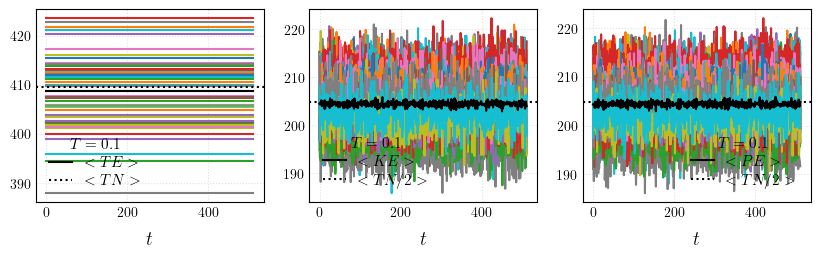

In [14]:
if True:
    for tmp in range(len(tempList[:1])):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labss = r'${:.2f}$'.format(temp)

        ALL_powspec = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        PSfld = ALL_powspec[:, 0, :]
        PSmom = ALL_powspec[:, 1, :]
        tlist  = np.arange(nTimeMAX)
        del ALL_powspec

        fft_ten = dx * nLat * np.sum(0.5*PSmom + 0.5 * w2(m2) * PSfld, axis=-1)
        fft_ken = dx * nLat * np.sum(0.5*PSmom                       , axis=-1)
        fft_pen = dx * nLat * np.sum(0.5 * w2(m2) * PSfld            , axis=-1)

        av_fft_ten = np.mean(dx * nLat * np.sum(0.5*PSmom + 0.5 * w2(m2) * PSfld, axis=-1), axis=0)
        av_fft_ken = np.mean(dx * nLat * np.sum(0.5*PSmom                       , axis=-1), axis=0)
        av_fft_pen = np.mean(dx * nLat * np.sum(0.5 * w2(m2) * PSfld            , axis=-1), axis=0)

        fig, ax = plt.subplots(1,3, figsize = (10,2.5))
        for sim in range(maxSim):
            ax[0].plot(tlist, fft_ten[sim])
            ax[1].plot(tlist, fft_ken[sim])
            ax[2].plot(tlist, fft_pen[sim])

        ax[0].plot(tlist, av_fft_ten, ls='-', color='k', label=r'$<TE>$')
        ax[1].plot(tlist, av_fft_ken, ls='-', color='k', label=r'$<KE>$')
        ax[2].plot(tlist, av_fft_pen, ls='-', color='k', label=r'$<PE>$')
        ax[0].axhline(temp * nLat , ls=':', color='k', label=r'$<T N>$')
        [aa.axhline(temp * nLat/2., ls=':', color='k', label=r'$<T N/2>$') for aa in ax[1:]]
        [aa.set_xlabel(r'$t$') for aa in ax]
        beautify(ax, ttl=labs)
        fig.show()

/gpfs/dpirvu/prefactor/x4096_m2eff1.0000_T0.1000_minSim0_maxSim50_up_to_nTMax512_initconds.npy


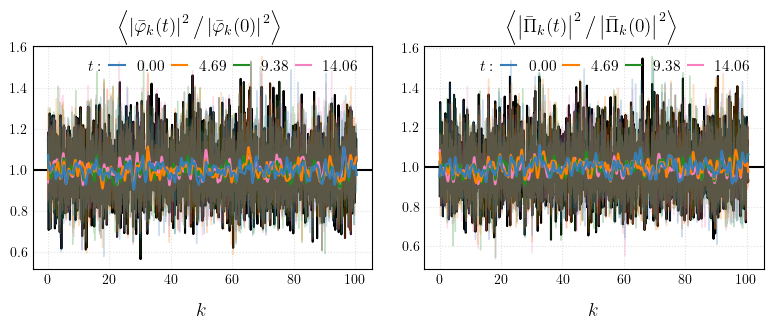

In [15]:
if True:
    clls = allcolors

    for tmp in range(len(tempList[:1])):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labss = r'${:.2f}$'.format(temp)

        # modes to plot:
        aa, bb = 1, knyq-1
        # time steps to plot
        tslist = np.arange(0, nTimeMAX, 150)
        tlist = np.arange(nTimeMAX)[tslist]

        ALL_powspec = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        PSfld = ALL_powspec[:, 0, tslist, aa:bb]
        PSmom = ALL_powspec[:, 1, tslist, aa:bb]
        del ALL_powspec

        path = init_cond_file(*exp_params, minSim, maxSim, nTimeMAX)
        print(path)
        initial_conditions = np.load(path, allow_pickle=True)

        fig, ax = plt.subplots(1,2, figsize = (8.,3.5))
        initcurve = np.mean(initial_conditions[:,4], axis=0)[aa:bb]
        ax[0].plot(klist[aa:bb], initcurve/pspec(temp,m2)[aa:bb], ls='-', color='k')

        initcurve = np.mean(initial_conditions[:,5], axis=0)[aa:bb]
        ax[1].plot(klist[aa:bb], initcurve/(w2(m2)*pspec(temp,m2))[aa:bb], ls='-', color='k')

        [aa.axhline(1., ls='-', color='k') for aa in ax]
        for tind, tt in enumerate(reversed(tlist)):
            tind = len(tlist) - 1 - tind

            curve = np.nanmean(PSfld[:,tind], axis=0)
            curve/= pspec(temp,m2)[aa:bb]
            ax[0].plot(klist[aa:bb], curve, ls='-', color=clls[tind], alpha=0.25, lw=1)

            curve = np.nanmean(PSmom[:,tind], axis=0)
            curve/= (w2(m2)*pspec(temp,m2))[aa:bb]
            ax[1].plot(klist[aa:bb], curve, ls='-', color=clls[tind], alpha=0.25, lw=1)

        for tind, tt in enumerate(reversed(tlist)):
            tind  = len(tlist) - 1 - tind
            lab = r'${:.2f}$'.format(tt*dx)

            curve = np.nanmean(PSfld[:,tind], axis=0)
            curve/= pspec(temp,m2)[aa:bb]
            curve = gaussian_filter1d(curve, 6, mode='nearest')
            ax[0].plot(klist[aa:bb], curve, ls='-', color=clls[tind], label=lab)

            curve = np.nanmean(PSmom[:,tind], axis=0)
            curve/= (w2(m2)*pspec(temp,m2))[aa:bb]
            curve = gaussian_filter1d(curve, 6, mode='nearest')
            plt.plot(klist[aa:bb], curve, ls='-', color=clls[tind], label=lab)

        for aa in ax:
            h, l = aa.get_legend_handles_labels() # Extracting handles and labels
            h, l = h[::-1], l[::-1]
            handles = [aa.plot([],marker="", ls="")[0]] + h
            labels = [r'$t:$'] + l  # Merging labels
            leg = aa.legend(handles, labels, ncol=len(tslist)+1, frameon=False, loc=1, handlelength=1., labelspacing=0.3, columnspacing=0.5)
    #    [aa.set_xscale('log') for aa in ax]
        [aa.set_xlabel(r'$k$') for aa in ax]
        ax[0].set_title(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \Big/ \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
        ax[1].set_title(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \Big/ \left|\bar{\Pi}_k(0)\right|^2 \right\rangle $')
        beautify(ax, lens=False)
        plt.tight_layout()
        plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()

[0.98715962]


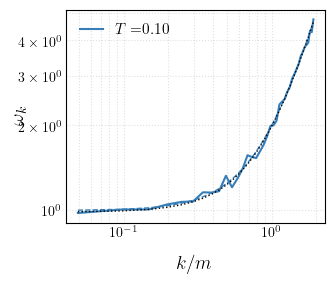

In [67]:
if True:
    save_meff = []
    cols=cycle(allcolors)
    fig, ax = plt.subplots(1, 1, figsize = (3.5,3.))
    for tmp in range(len(tempList[:1])):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labs = r'${:.2f}$'.format(temp)
        col = next(cols)

        indmax = np.arange(len(klist))[(klist>0.)&(klist<=2.)][-1]
        # modes to plot:
        aa, bb = 1, indmax
        # time steps to average
        tlist = np.arange(400, 512)

        ALL_powspec = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        PSfld = np.nanmean(np.nanmean(ALL_powspec[:, 0, tlist, aa:bb], axis=0), axis=0)
        PSmom = np.nanmean(np.nanmean(ALL_powspec[:, 1, tlist, aa:bb], axis=0), axis=0)
        curve = PSmom/PSfld
        ks = klist[aa:bb]
        del ALL_powspec, PSfld, PSmom

        w2m = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
        pred_fit = lambda x, data: sco.curve_fit(w2m, x, data)

        plt.plot(ks, w2m(ks, m2), ls='--', lw=1, color=col)
        plt.plot(ks, curve, ls='-', color=col, label=r'$T=$'+labs)

        best_ps, _ = pred_fit(ks, curve)
        print(best_ps)
        save_meff.append(best_ps[0])
        plt.plot(ks, w2m(ks, *best_ps), color='k', ls=':', lw=1)

    beautify(ax)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel(r'$\omega_k$')
    ax.set_xlabel(r'$k/m$')
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


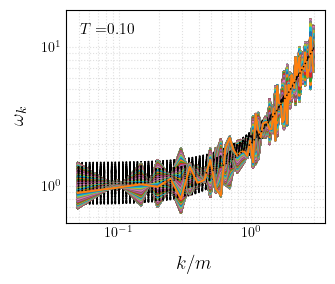

In [59]:
if True:
    meff_func_t = []
    for tmp in range(len(tempList[:1])):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labs = r'${:.2f}$'.format(temp)

        meff_func_t.append([])

        indmax = np.arange(len(klist))[(klist>0.)&(klist<=3.)][-1]
        # modes to plot:
        aa, bb = 1, indmax
        # time steps to plot
        tlist = np.arange(nTimeMAX)

        ALL_powspec = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        PSfld = ALL_powspec[:, 0, tlist, aa:bb]
        PSmom = ALL_powspec[:, 1, tlist, aa:bb]
        ks = klist[aa:bb]
        del ALL_powspec

        w2m = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
        pred_fit = lambda x, data: sco.curve_fit(w2m, x, data)

        fig, ax = plt.subplots(1, 1, figsize = (3.5,3.))
        plt.plot(ks, w2m(ks, m2), ls='-', lw=1, color='k')
        for tind, tt in enumerate(tlist):
            curve = np.nanmean(PSmom[:,tind,:], axis=0)/np.nanmean(PSfld[:,tind,:], axis=0)
            plt.plot(ks, curve, ls='-')

            best_ps, _ = pred_fit(ks, curve)
            meff_func_t[tmp].append([tt, best_ps[0]])
            plt.plot(ks, w2m(ks, *best_ps), color='k', ls=':', lw=1)

        del PSfld, PSmom
        beautify(ax, ttl=r'$T=$'+labss)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylabel(r'$\omega_k$')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        plt.show()

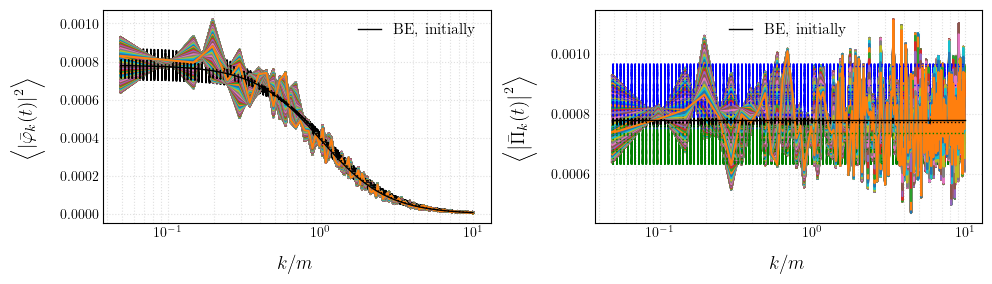

In [60]:
if True:
    teff_func_t, teff_from_mom_lower_bound, teff_from_mom_upper_bound, teff_func_t_from_mom = [], [], [], []

    for tmp in range(len(tempList[:1])):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labss = r'${:.2f}$'.format(temp)

        teff_func_t.append([])
        teff_from_mom_lower_bound.append([])
        teff_from_mom_upper_bound.append([])
        teff_func_t_from_mom.append([])

        indmax = np.arange(len(klist))[(klist>0.)&(klist<=10.)][-1]
        # modes to plot:
        aa, bb = 1, indmax
        # time steps to plot
        tlist = np.arange(nTimeMAX)

        ALL_powspec = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        PSfld = ALL_powspec[:, 0, tlist, aa:bb]
        PSmom = ALL_powspec[:, 1, tlist, aa:bb]
        ks = klist[aa:bb]
        del ALL_powspec

        w2m    = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
        pofldk = lambda te,ks,m2: te / lenLat / w2m(ks, m2)
        pomomk = lambda te,ks,m2: te / lenLat / w2m(ks, m2) * w2m(ks, m2)

        fig, ax = plt.subplots(1,2, figsize = (10.,3.))
        for tind, tt in enumerate(tlist):
            if tind!=0:
                pspecfd = lambda ks, te: pofldk(te, ks, meff_func_t[tmp][tind][1])
                pspecmm = lambda ks, te: pomomk(te, ks, meff_func_t[tmp][tind][1])
            else:
                pspecfd = lambda ks, te: pofldk(te, ks, m2)
                pspecmm = lambda ks, te: pomomk(te, ks, m2)
            pred_fit_fd = lambda x, data: sco.curve_fit(pspecfd, x, data)
            pred_fit_mm = lambda x, data: sco.curve_fit(pspecmm, x, data)

            curve = np.nanmean(PSfld[:,tind], axis=0)
            ax[0].plot(ks, curve, ls='-')

            best_ps, _ = pred_fit_fd(ks, curve)
            teff_func_t[tmp].append([tt, best_ps[0]])
            ax[0].plot(ks, pspecfd(ks, *best_ps), color='k', lw=1, ls=':')

            curve = np.nanmean(PSmom[:,tind], axis=0)
            ax[1].plot(ks, curve, ls='-')

            best_ps, _ = pred_fit_mm(ks, curve)
            teff_func_t_from_mom[tmp].append([tt, best_ps[0]])
            ax[1].plot(ks, pspecmm(ks, *best_ps), color='k', lw=1, ls=':')

            cm = np.argmin(curve)
            cm1, cm2 = max(cm-1, 0), min(cm+2, len(ks))
            best_ps, _ = pred_fit_mm(ks[cm1:cm2], curve[cm1:cm2])
            teff_from_mom_lower_bound[tmp].append([tt, best_ps[0]])
            ax[1].plot(ks, pspecmm(ks, *best_ps), color='g', lw=1, ls=':')

            dm = np.argmax(curve)
            dm1, dm2 = max(dm-1, 0), min(dm+2, len(ks))
            best_ps, _ = pred_fit_mm(ks[dm1:dm2], curve[dm1:dm2])
            teff_from_mom_upper_bound[tmp].append([tt, best_ps[0]])
            ax[1].plot(ks, pspecmm(ks, *best_ps), color='b', lw=1, ls=':')

        ax[0].plot(ks, pofldk(temp, ks, m2), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')
        ax[1].plot(ks, pomomk(temp, ks, m2), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')

        del PSfld, PSmom
        leg = ax[0].legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
        ax[0].set_xscale('log')
        ax[0].set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax[0].set_xlabel(r'$k/m$')

        leg = ax[1].legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
        ax[1].set_xscale('log')
        ax[1].set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')
        ax[1].set_xlabel(r'$k/m$')

        beautify(ax)
        plt.tight_layout()
        plt.show()


In [68]:
save_meff = np.array(save_meff)
meff_func_t = np.array(meff_func_t)
teff_func_t = np.array(teff_func_t)
teff_from_mom_lower_bound = np.array(teff_from_mom_lower_bound)
teff_from_mom_upper_bound = np.array(teff_from_mom_upper_bound)
teff_func_t_from_mom = np.array(teff_func_t_from_mom)

print(massq(tempList))
print(np.array([round(ii,2) for ii in save_meff]))

1.0
[0.99]


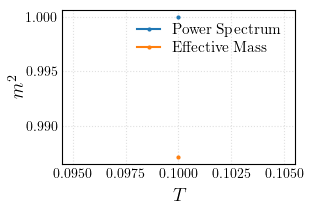

In [69]:
fig, ax = plt.subplots(1,1, figsize = (3,2))
plt.plot(tempList, massq(tempList), 'o-', ms=2, label=r'$\rm Power \; Spectrum$')
plt.plot(tempList, save_meff, 'o-', ms=2, label=r'$\rm Effective \; Mass$')
beautify(ax)
plt.ylabel(r'$m^2$')
plt.xlabel(r'$T$')
plt.show()

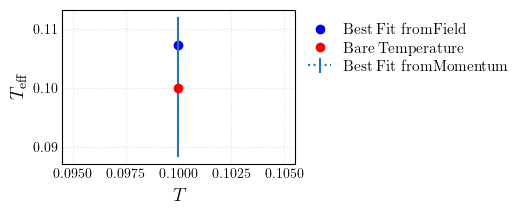

In [70]:
tempList0 = tempList[:1]

fig, ax = plt.subplots(1,1, figsize = (3,2))
plt.plot(tempList0, np.mean(teff_func_t[:,:,1], axis=-1), 'bo', label=r'$\rm Best \; Fit \; from Field$')

av_teff_from_mom = np.mean(teff_func_t_from_mom[:,:,1], axis=-1)
asymmetric_error = [av_teff_from_mom - np.mean(teff_from_mom_lower_bound[:,:,1], axis=-1), \
                    np.mean(teff_from_mom_upper_bound[:,:,1], axis=-1) - av_teff_from_mom]

plt.errorbar(tempList0, av_teff_from_mom, yerr=asymmetric_error, ls=':', label=r'$\rm Best \; Fit \; from Momentum$')
plt.plot(tempList0, tempList0, 'ro', label=r'$\rm Bare \; Temperature$')
beautify(ax, bb=(1,1))
plt.ylabel(r'$T_{\rm eff}$')
plt.xlabel(r'$T$')
plt.show()


0 0.1 1.0 0.987159618802543


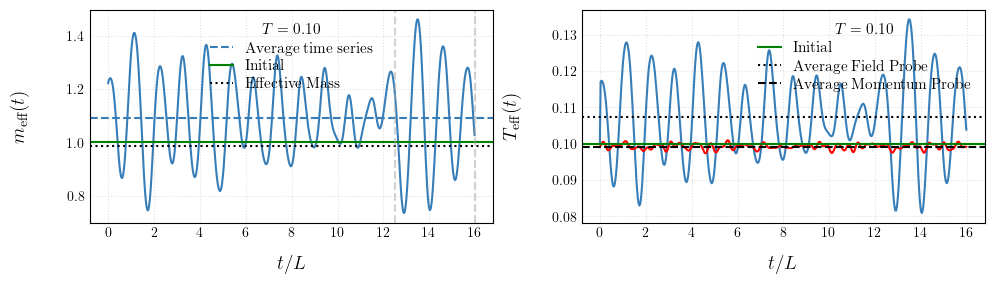

In [75]:
cls = cycle(allcolors[:4])
for tmp, temp in enumerate(tempList[:1]):
    temp, m2, sigmafld = get_model(*general, tmp, case)
    exp_params = np.asarray([nLat, m2, temp])

    fig, ax = plt.subplots(1,2, figsize = (10,3))
    col = next(cls)

    effmass = meff_func_t[tmp,:,1]
    efftemp_fld = teff_func_t[tmp,:,1]
    efftemp_mom = teff_func_t_from_mom[tmp,:,1]
    efftemp_mom_errl = teff_from_mom_lower_bound[tmp,:,1]
    efftemp_mom_erru = teff_from_mom_upper_bound[tmp,:,1]
    tlist = meff_func_t[tmp,:,0]*dx

    ax[0].plot(tlist, effmass, color=col)
    ax[0].axhline(np.mean(effmass), color=col, ls='--', label=r'$\rm Average \; time \; series$')
    ax[0].axhline(m2              , color='g', ls='-', label=r'$\rm Initial$')
    ax[0].axhline(save_meff[tmp]  , color='k', ls=':', label=r'$\rm Effective \; Mass$')
    ax[0].set_ylabel(r'$m_{\rm eff}(t)$')
    ax[0].set_xlabel(r'$t/L$')

    tlistmeff = np.arange(400, 512)*dx
    ax[0].axvline(tlistmeff[0], color='darkgray', alpha=0.5, ls='--')
    ax[0].axvline(tlistmeff[-1], color='darkgray', alpha=0.5, ls='--')

 #  l1 = ax[1].fill_between(tlist, efftemp_mom_errl, efftemp_mom_erru, color=col, alpha=0.2)
    l2,= ax[1].plot(tlist, efftemp_fld, color=col, ls='-')
    ax[1].plot(tlist, efftemp_mom, color='r', ls='-')
    ax[1].axhline(temp                , color='g', ls='-', label=r'$\rm Initial$')
    ax[1].axhline(np.mean(efftemp_fld), color='k', ls=':', label=r'$\rm Average \; Field \; Probe$')
    ax[1].axhline(np.mean(efftemp_mom), color='k', ls='--', label=r'$\rm Average \; Momentum \; Probe$')

    ax[1].set_ylabel(r'$T_{\rm eff}(t)$')
    ax[1].set_xlabel(r'$t/L$')
    beautify(ax, ttl=r'$T={:.2f}$'.format(temp))
    plt.tight_layout()
    plt.show()

In [44]:
noamin = False
if noamin:
    fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
    camera = Camera(fig)
    nT, nN = np.shape(fld)
    for tind, tt in enumerate(np.arange(0, nT, 2)):

        ls = plt.plot(np.arange(nN)*dx, fld[tt], ls='-', color=allcolors[0], lw=1)
        ax.axhline(0., ls=':', color='k', lw=0.5)
        ax.set_xlabel(r'$r$')
        ax.set_ylabel(r'$\bar{\varphi}(r)$')
        beautify_anim(ax)
        plt.legend(ls, [r'$t = {:.1f}$'.format(round(tt*dx,1))], loc=1,\
                  frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
        plt.tight_layout()
        camera.snap()
    animation = camera.animate(interval = 0.0001);
    animation.save('./plots/animation_simulation_unbounded.gif', writer = 'imagemagick')


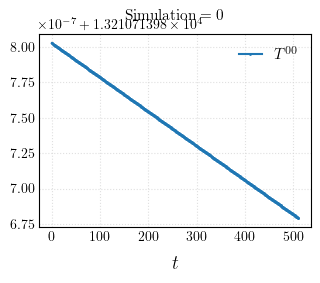

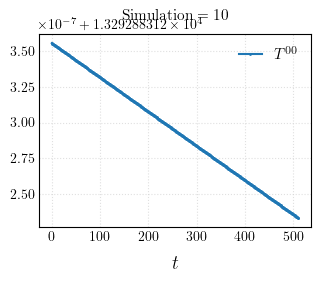

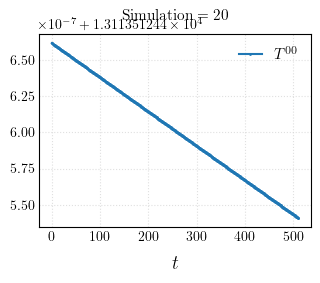

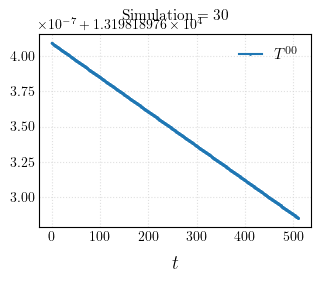

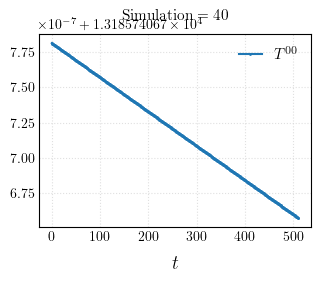

In [58]:
if True:
    for tmp, temp in enumerate(tempList[:1]):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])

        tlist = np.arange(nTimeMAX)
        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))
        for sim, (momentum, energy) in enumerate(zip(ALL_emt, ALL_toten)):
            if sim%10!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, emtcut, tencut = tlist[:nnrg], momentum[:nnrg], energy[:nnrg]
            fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
            ax.plot(tcut, tencut, label=r'$T^{00}$', ls='-', marker='o', ms=1)
          #  ax.plot(tcut, emtcut, label=r'$T^{0x}$', ls='-', marker='o', ms=1)
            ax.set_xlabel(r'$t$')
            ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim), fontsize=11)
            beautify(ax)
            plt.show()
